In [232]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [233]:
#loading the dataset
data = pd.read_excel("/content/bankdata.xlsx")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [234]:
data.shape

(45211, 17)

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [236]:
#checking null values
data.isnull().sum()    #no any null values in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [237]:
#description of data
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [238]:
#variance of dataset
data.var()

<ipython-input-238-55a4f88eb013>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [239]:
#skewness of data
data.skew()

<ipython-input-239-2794e2a4c37b>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [240]:
#kurtosis of dataset
data.kurt()

<ipython-input-240-bb808d3ca88f>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [241]:
#one hot encoding of caregorical variable
data1 = pd.get_dummies(data,columns =['job','marital' ,'education', 'contact', 'poutcome', 'month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [242]:
#Checking duplicate values
data[data.duplicated()].shape    #No any duplicate value

(0, 17)

In [243]:
#correlation of data set
data.corr()

<ipython-input-243-ff22d7b8f110>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<ipython-input-244-c399cc3d0d33>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


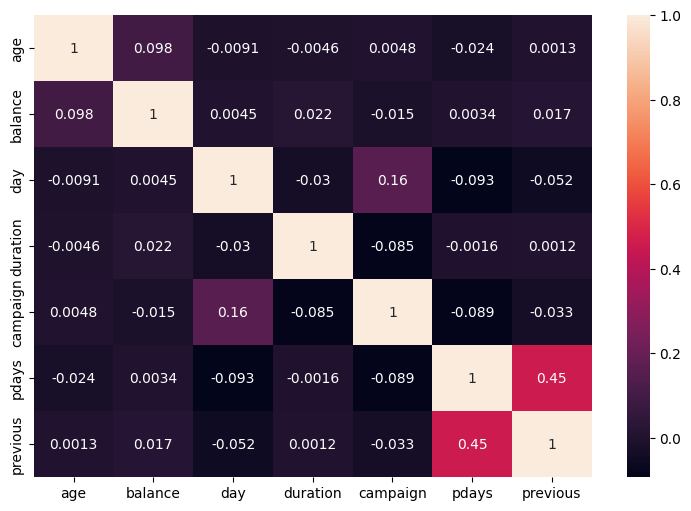

In [244]:
#heatmap
fig = plt.figure(figsize= (9,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [245]:
discrete_feature = [feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 10


In [246]:
continuous_feature = [feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 7


Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

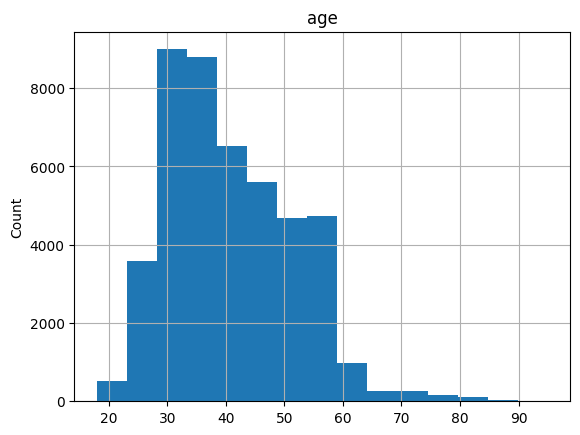

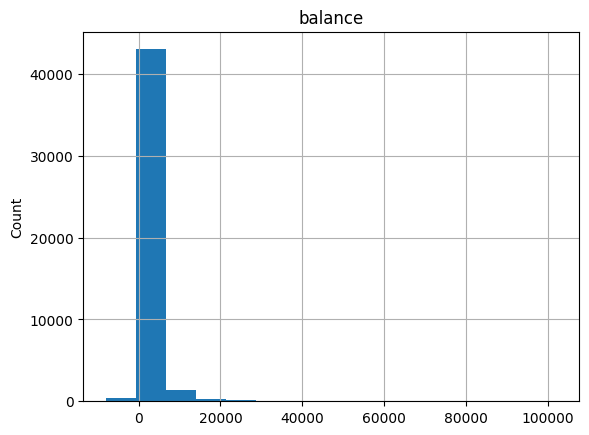

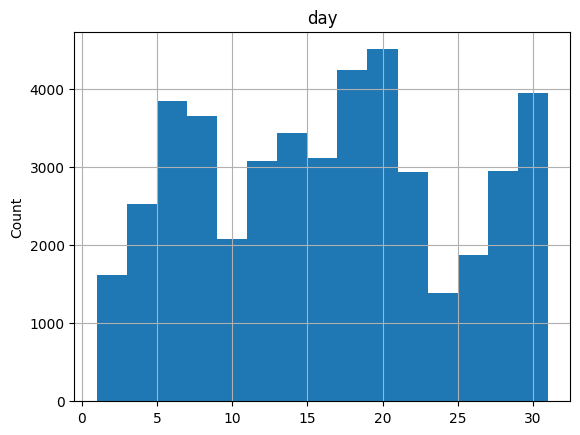

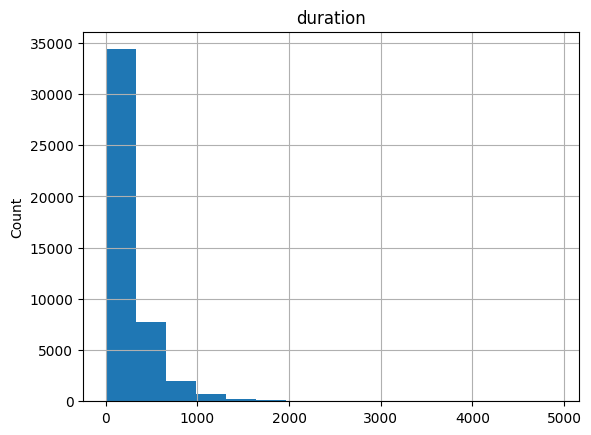

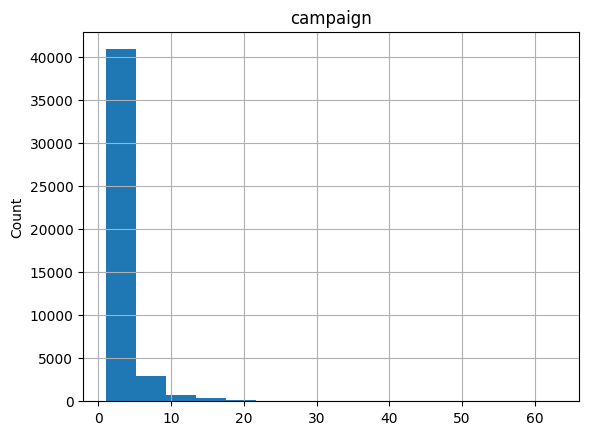

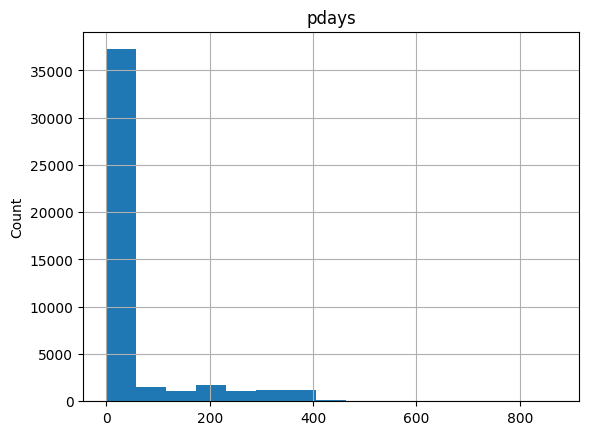

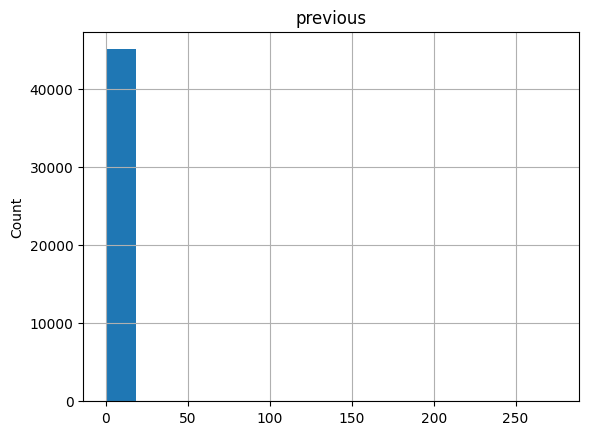

In [247]:
for feature in continuous_feature:
    bank_data1 = data.copy()
    bank_data1[feature].hist(bins=15)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

# Log transformation

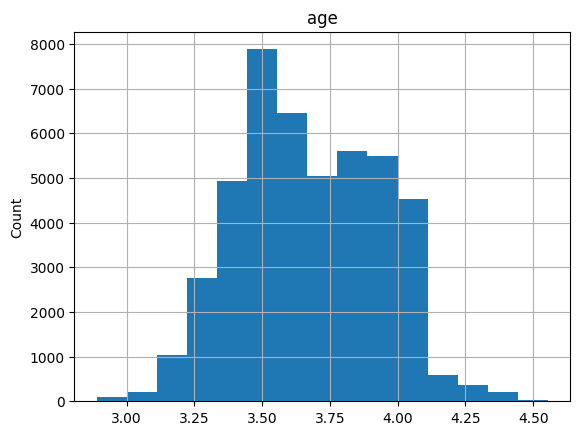

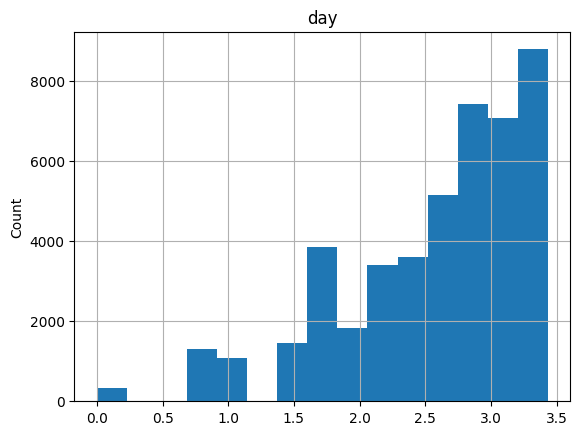

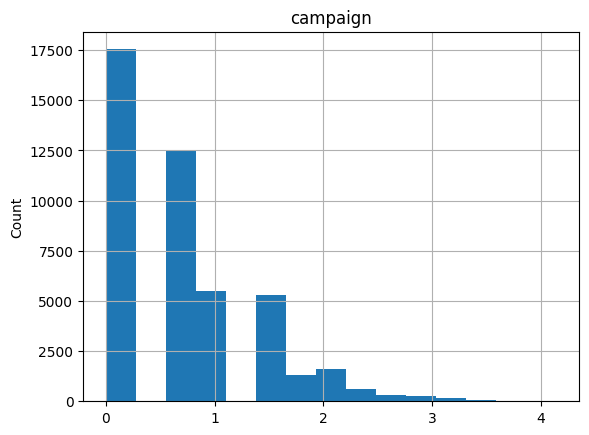

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


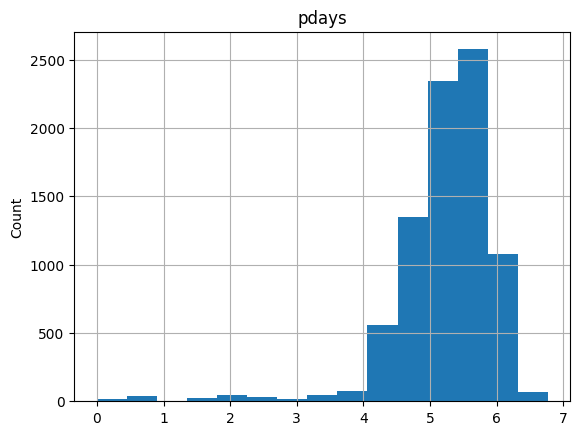

In [248]:
for feature in continuous_feature:
    bank_data2 = data.copy()
    if 0 in bank_data2[feature].unique():
        pass
    else:
        bank_data2[feature] = np.log(bank_data2[feature])
        bank_data2[feature].hist(bins=15)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

# Outliers Detection

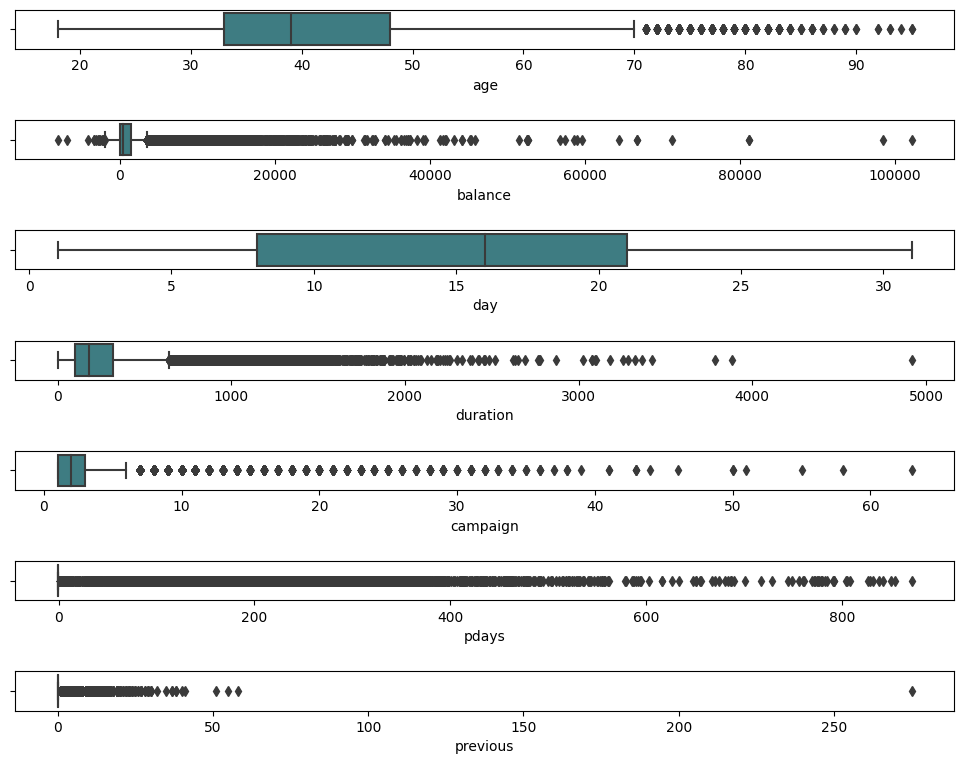

In [249]:
outlier = data.copy()
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

There are lot of outliers present in the dataset but we can't drop them because they are present in a very large quantity and can be important for model building.

# After Log-Transformation

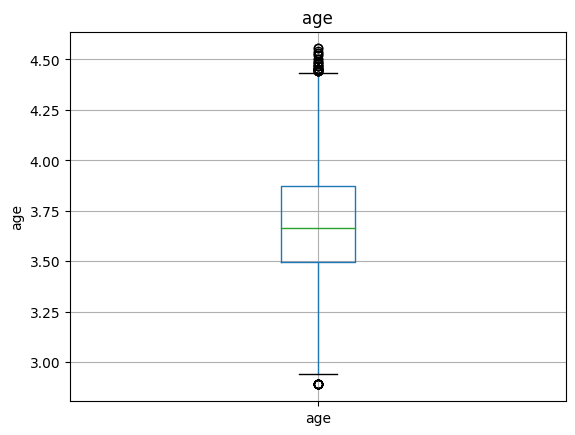

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


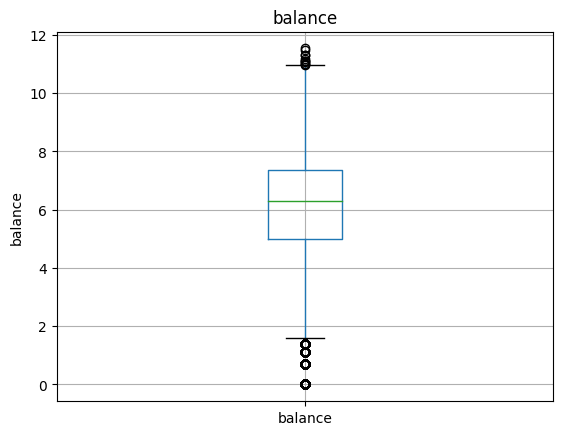

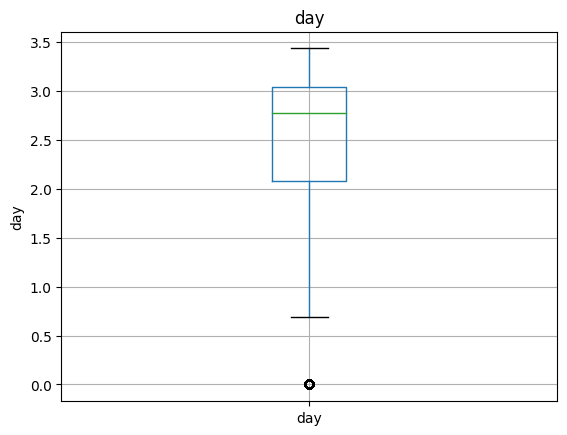

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


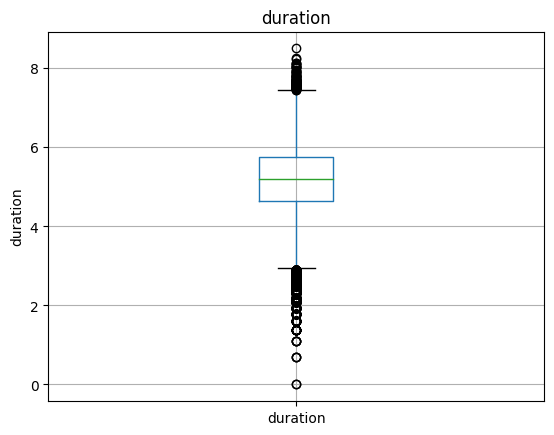

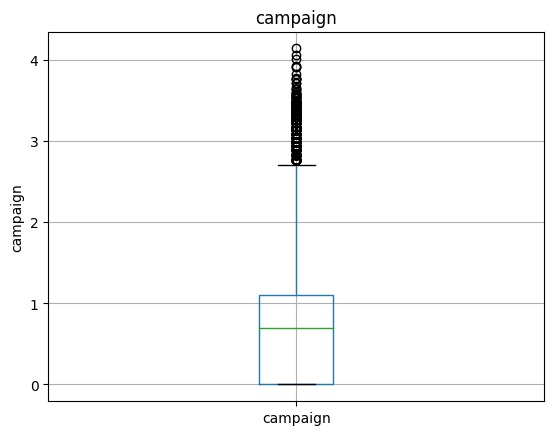

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


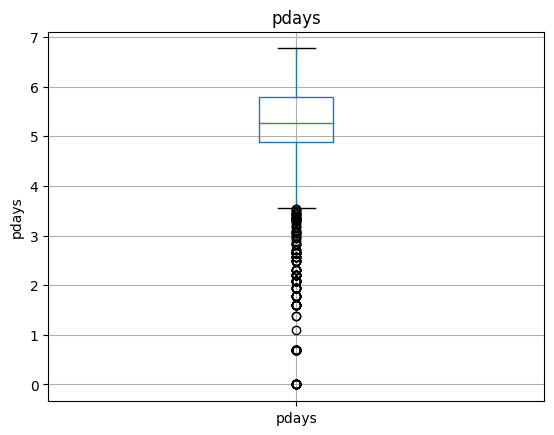

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


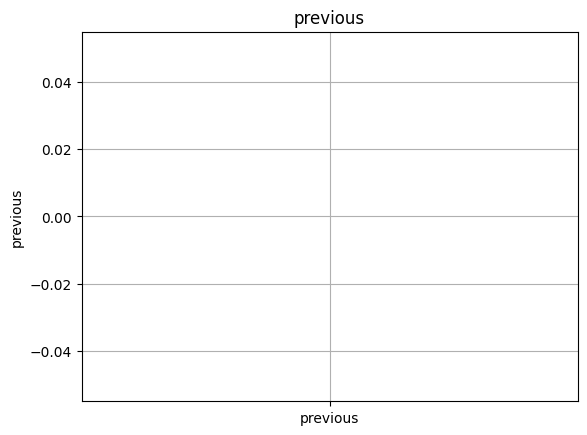

In [250]:
for feature in continuous_feature:
    bank_data3 = data.copy()
    bank_data3[feature] = np.log(bank_data3[feature])
    bank_data3.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [251]:
data.info()
data1 = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [252]:
data[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = data[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
bank_data_new = data

In [253]:
data4 = pd.get_dummies(data, drop_first = True)
data4

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# Model Building

In [254]:
# Dividing our data into input and output variables
x = data4.drop('y_yes', axis=1)
y = data4[['y_yes']]

In [255]:
x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [256]:
y

,y_yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [257]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=12)
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [258]:
classifier.coef_

array([[-1.72343098e-02,  1.99466147e-05, -9.09063549e-03,
         3.81951023e-03, -4.00207203e-01,  2.21722428e-03,
        -1.42141250e-01, -2.84063913e-01, -3.00780149e-02,
        -9.98226681e-03,  9.00932207e-03,  1.84898858e-01,
        -1.77117287e-02, -9.88393446e-02,  3.40868415e-02,
        -7.66654409e-02,  3.38603353e-03,  2.72982326e-03,
        -1.94892216e-01, -1.37796126e-01, -3.02069623e-01,
         5.39391478e-02,  1.52726927e-02, -2.04516536e-02,
        -7.47423907e-01, -2.15199800e-01,  5.52145342e-02,
        -4.79638365e-01,  2.81446948e-02,  3.21399677e-02,
        -1.52643630e-02, -1.49484147e-02, -9.06604322e-02,
        -6.22077367e-02,  9.70028352e-02, -4.65736892e-01,
        -6.37014710e-02,  1.10267496e-01,  8.34238626e-02,
        -3.44140606e-02,  3.48746204e-01, -4.74661367e-01]])

In [259]:
classifier.intercept_

array([-0.31402471])

In [260]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
#Minmaxscaler
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(data4)
scaled_x = scalar.transform(data4)

In [261]:
scaled_x

array([[0.51948052, 0.09225936, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.07306666, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.07282153, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7012987 , 0.12468905, 0.53333333, ..., 1.        , 0.        ,
        1.        ],
       [0.50649351, 0.07886805, 0.53333333, ..., 0.        , 1.        ,
        0.        ],
       [0.24675325, 0.09977666, 0.53333333, ..., 0.        , 0.        ,
        0.        ]])

In [262]:
classifier1 = LogisticRegression()
classifier1.fit(scaled_x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [263]:
classifier1.coef_

array([[ 1.82233826e-02,  3.21169848e-02, -5.84428022e-02,
         9.79268731e-01, -1.03507952e-01,  3.44242138e-03,
         4.78007233e-03, -7.77903244e-02, -5.28033374e-02,
        -7.29759875e-02, -1.84777222e-02,  1.71042023e-01,
        -2.78870090e-02, -5.63315288e-02,  1.08909794e-01,
        -3.82319807e-02,  2.38023798e-02, -1.76105768e-02,
        -9.93007334e-02,  7.77546828e-02,  2.46424727e-02,
         1.04327513e-01,  3.80948899e-02, -3.53246515e-02,
        -2.56101209e-01, -1.79950815e-01, -5.67103402e-02,
        -4.38613668e-01, -2.46825412e-01,  9.00406231e-02,
        -5.60451448e-02, -1.78296919e-01, -2.03431751e-01,
         1.34525734e-02,  2.48401313e-01, -1.81235087e-01,
        -1.95674148e-01,  2.38991608e-01,  1.87321917e-01,
         2.41610769e-03,  6.20745294e-01, -1.99322830e-01,
         1.36183835e+01]])

In [264]:
proba1 = classifier1.predict_proba(scaled_x)
proba1

array([[9.99787042e-01, 2.12957773e-04],
       [9.99775727e-01, 2.24273394e-04],
       [9.99848010e-01, 1.51990097e-04],
       ...,
       [9.85005251e-04, 9.99014995e-01],
       [9.99647288e-01, 3.52712076e-04],
       [9.99545167e-01, 4.54832904e-04]])

In [265]:
y_pred1 = classifier1.predict(scaled_x)
y_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [266]:
# Predict for x dataset
y_pred=classifier.predict(x_train)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

# Testing Model Accuracy

In [267]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y_train,y_pred)
confusion_matrix

array([[31307,   622],
       [ 3327,   912]])

In [268]:
#Classification report
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch?
## F1 score – What percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.59      0.22      0.32      4239

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



In [269]:
accuracy_score(y_train,y_pred)

0.8908150851581509

AUC score : 59.78%


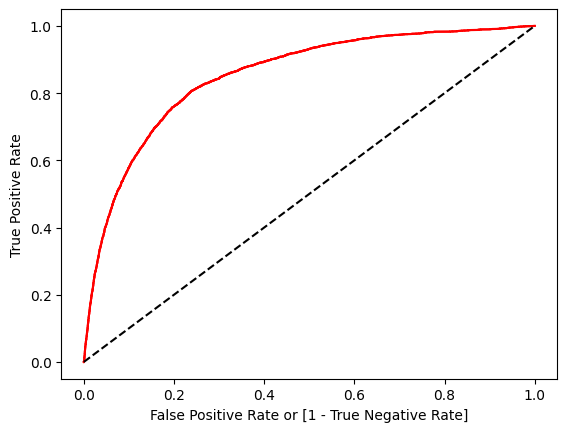

In [270]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_train,classifier.predict_proba(x_train)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_train,y_pred)
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [271]:
auc

0.5978321792666438

In [272]:
#predictions of test data
y_pred_test1 = classifier.predict(x_test)
y_pred_test1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [273]:
accuracy_score(y_test,y_pred_test1)

0.8928452947030853

AUC score : 85.90%


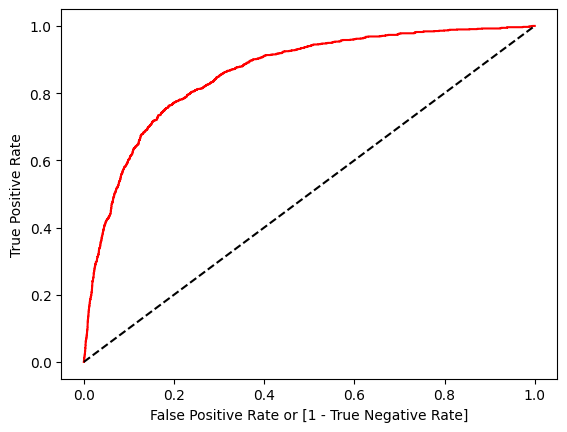

In [274]:
fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,classifier.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [275]:
classification_report2 = classification_report(y_test,y_pred_test1)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.61      0.21      0.32      1050

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



# Compare the train-set and test-set accuracy

In [276]:
print('Training set score : {:.2f}%'.format(classifier.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(classifier.score(x_test, y_test)*100))

Training set score : 89.08%
Test set score     : 89.28%
